# Introduction

The purpose of this project is to Analyze the biodiversity and variance in Endangered Species within National Parks. 

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

###  Project Goals 

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservation status, and those species and their relationship to the national parks. Some questions are posed: 

- What is the distribution of conservation status for species? 
- Are certain types of species more likely to be endangered? 
- Which animal is most prevalent and what is their distribution amongst parks? 

#### Importing Modules



In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt 

%matplotlib inline

**Load and examine Data** 

In [3]:
observations = pd.read_csv('Observations.csv')

species = pd.read_csv('Species_info.csv')

In [4]:
species.head(10)


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


Initial observation of the above species file, it contains information regarding species as follows: 
- __category__ - This defines the type of animal clas 
- __scientific_name__ - This is the official name of the animal, typically deriving from latin
- __common_names__ - This is the 'modern day' name for th type of species 
- __conservation_status__ - This category describes the endangered status of the species 

In [5]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


Initial inspection of the observations file, it contains information data as follows: 
- __scientific_name__- scientific name for the species
- __park_name__ - name of the park in which species is found
 - __observations__ - The amount of observations noted over 7 days

In [6]:
print(f'Species shape: {species.shape}')
print(f'Observations shape: {observations.shape}')

Species shape: (5824, 4)
Observations shape: (23296, 3)


Now that we have loaded in the data and gathered some information regarding the size and type of data we are dealing with, we can begin to carry our some Exploratory Data Analysis 

In [7]:
print('Number of distinct species:',species['scientific_name'].nunique())
print('Type of Animal Classes:', species['category'].unique())

Number of distinct species: 5541
Type of Animal Classes: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [8]:
species['category'].value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

With the above data, we can see that there are a 5541 unique species over 7 different animal classes, with Vascular Plant being the most common type noted

In [9]:
print(f'Number of unique conservation statuses:' ,species['conservation_status'].nunique())
print(f'Unique conservation statuses:', species['conservation_status'].unique())

Number of unique conservation statuses: 4
Unique conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [10]:
print(f'Nan Species:',species['conservation_status'].isna().sum())
print(species['conservation_status'].value_counts())
nan_species = species['conservation_status'].isna().sum()


Nan Species: 5633
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64


The above data signifies that we have 4 areas of conern, with a 5th variable names 'nan'. 

In [11]:
print(f'There has been a total of' , observations.observations.sum() , 'observations')

There has been a total of 3314739 observations


### Data Cleaning 

Firstly, we will look at the `conservation_status` within the dataframe `species`. As previously shown above, there are 5 different variables for this column: 

- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

We can assume that the value in this column being `NaN` represents no area of conver, therefore these values will need to be converted to `No Intervention`.

In [12]:
species.fillna('No Intervention', inplace=True)
species['conservation_status'].value_counts()

No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

In [13]:
species.duplicated().sum()

0

In [14]:
species.drop_duplicates(subset=['scientific_name'],keep='last',inplace=True)
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  5541 non-null   object
dtypes: object(4)
memory usage: 216.4+ KB


In [15]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [16]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [17]:
observations[observations.duplicated(subset=['scientific_name', 'park_name'])]

,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone National Park,235
490,Agrostis mertensii,Yosemite National Park,128
945,Rumex crispus,Yellowstone National Park,255
1213,Dianthus barbatus,Bryce National Park,110
1259,Riparia riparia,Bryce National Park,91
...,...,...,...
23258,Microtus longicaudus,Yellowstone National Park,244
23259,Agrostis scabra,Bryce National Park,118
23267,Oxalis corniculata,Yosemite National Park,164
23273,Dactylis glomerata,Bryce National Park,89


In [18]:
observations.duplicated().sum()

15

In [19]:
observations.drop_duplicates(subset = ['scientific_name', 'park_name'], inplace=True)

In [20]:
observations.duplicated().sum()

0

In [21]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  22164 non-null  object
 1   park_name        22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 692.6+ KB


### Merging Dataframes 

In [22]:
observations = pd.merge(left=observations,right=species,how='inner', left_on='scientific_name', right_on='scientific_name')
observations[['scientific_name','park_name','observations','conservation_status']]

,scientific_name,park_name,observations,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,No Intervention
1,Vicia benghalensis,Yosemite National Park,148,No Intervention
2,Vicia benghalensis,Yellowstone National Park,247,No Intervention
3,Vicia benghalensis,Bryce National Park,104,No Intervention
4,Neovison vison,Great Smoky Mountains National Park,77,No Intervention
...,...,...,...,...
22159,Gulo gulo,Yosemite National Park,157,No Intervention
22160,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,No Intervention
22161,Dichanthelium depauperatum,Bryce National Park,80,No Intervention
22162,Dichanthelium depauperatum,Yellowstone National Park,255,No Intervention


In [23]:
observations.category.value_counts()

Vascular Plant       17048
Bird                  1952
Nonvascular Plant     1332
Mammal                 704
Fish                   500
Amphibian              316
Reptile                312
Name: category, dtype: int64

In [24]:
observations.park_name.value_counts()

Great Smoky Mountains National Park    5541
Yosemite National Park                 5541
Yellowstone National Park              5541
Bryce National Park                    5541
Name: park_name, dtype: int64

In [25]:
observations.conservation_status.value_counts()

No Intervention       21448
Species of Concern      604
Endangered               60
Threatened               40
In Recovery              12
Name: conservation_status, dtype: int64

In [26]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,6.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


From the `Endangered` status, we have found that 7 of those were mammals, and 4 of those were birds. In the `In Recovery` status, 3 were birds and 1 were mammals, which could indicate that birds are recovering more noticably than mammals

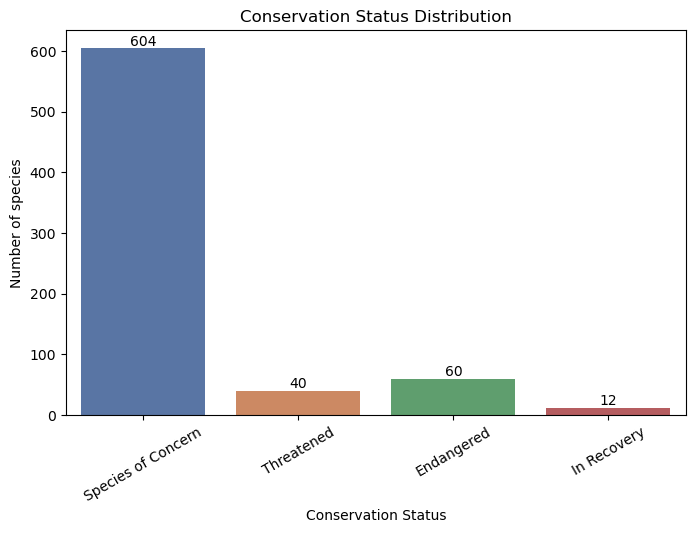

<Figure size 640x480 with 0 Axes>

In [27]:
In_danger = observations[observations.conservation_status != 'No Intervention']
plt.figure(figsize=(8,5))
sns.set_palette('deep')
ax=sns.countplot(x=In_danger.conservation_status)
plt.title('Conservation Status Distribution')
plt.xlabel('Conservation Status')
plt.ylabel('Number of species')
plt.xticks(rotation=30)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

In [28]:
observations.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention


Text(0, 0.5, 'Species Count')

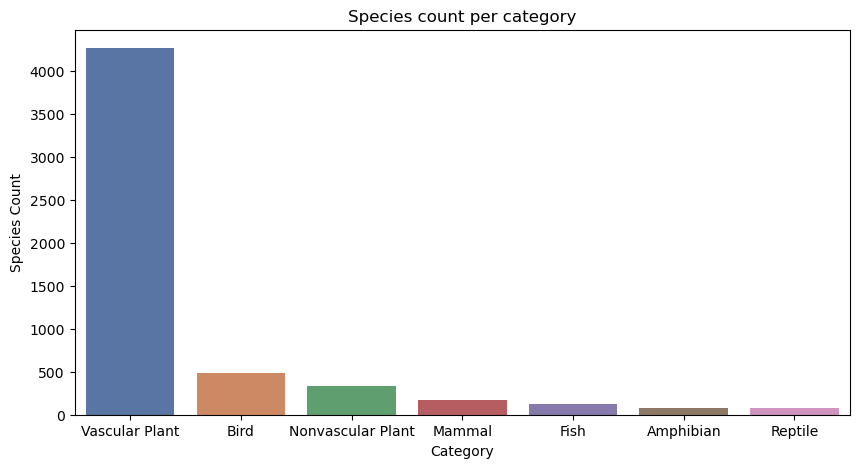

In [29]:
plt.figure(figsize=(10,5))
sns.set_palette('deep')
ax = sns.countplot(x=species.category,order=species.category.value_counts().index)
plt.title('Species count per category')
plt.xlabel('Category')
plt.ylabel('Species Count')

Text(0.5, 1.0, 'Conservation Status by Category')

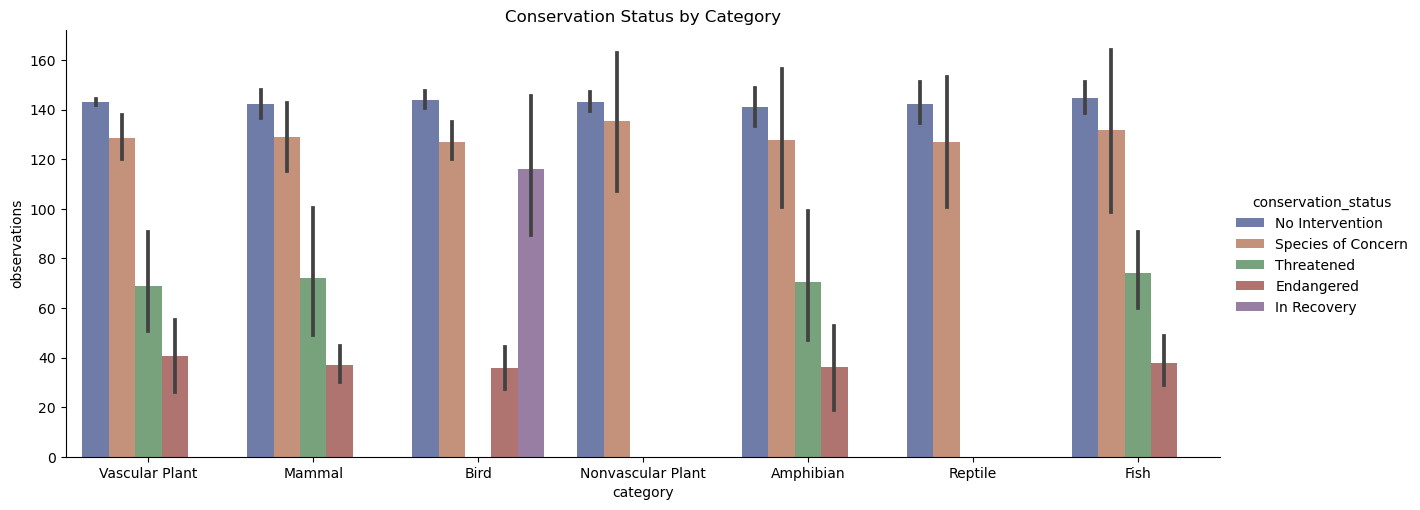

In [30]:
observations.head(10)

ax = sns.catplot(
    data=observations, kind="bar",
    x="category", y="observations", hue="conservation_status",
    palette="dark", alpha=0.6, aspect=2.5
)
plt.title('Conservation Status by Category')


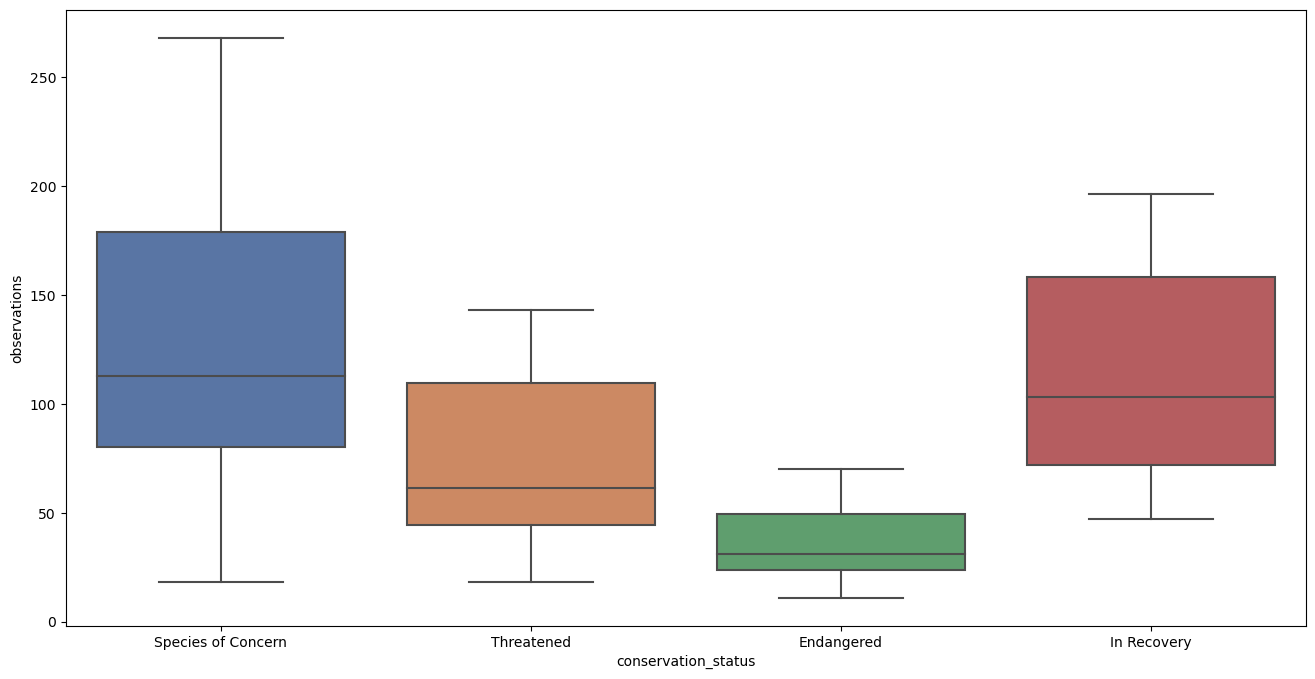

<Figure size 640x480 with 0 Axes>

In [31]:
no_danger = observations[observations.conservation_status != 'No Intervention']
sns.set_palette('deep')
fig= plt.figure(figsize=(16,8))
sns.boxplot(data=no_danger, y='observations', x='conservation_status')
plt.show()
plt.clf()


The next question we have asked it: 

- Are certain types of species more likely to be endangered?

We can look at the conservation status type `endangered` by animal type for an answer to the question. 

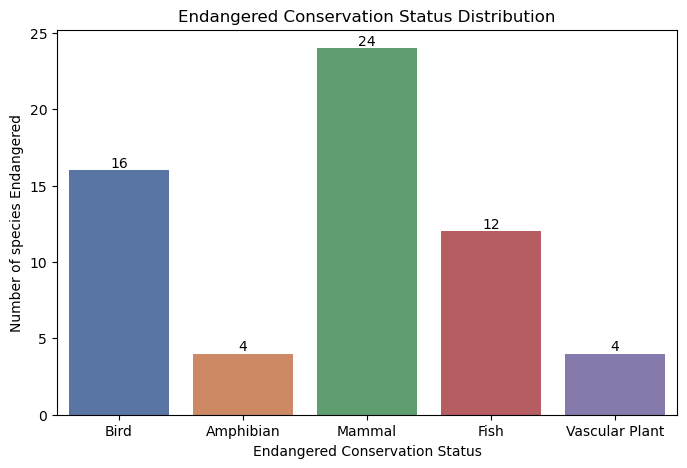

<Figure size 640x480 with 0 Axes>

In [32]:
endangered_species= observations[observations.conservation_status == 'Endangered']
plt.figure(figsize=(8,5))
sns.set_palette('deep')
ax=sns.countplot(x=endangered_species.category)
plt.title('Endangered Conservation Status Distribution')
plt.xlabel('Endangered Conservation Status')
plt.ylabel('Number of species Endangered')
#plt.xticks(rotation=30)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()


In [33]:
observations.conservation_status.value_counts()

No Intervention       21448
Species of Concern      604
Endangered               60
Threatened               40
In Recovery              12
Name: conservation_status, dtype: int64

In [34]:
observations['is_protected'] = observations['conservation_status'] != 'No Intervention'

category_counts = observations.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,114,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


To get a better understanding of the species type as `not protected` vs `protected` we could look at this value as a percentage. 

In [35]:
category_counts['Percentage_of_protection'] = round(category_counts.protected / (category_counts.not_protected + category_counts.protected) *100,2)

category_counts

,category,not_protected,protected,Percentage_of_protection
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,114,11,8.80
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


Next we could look at the distribution amongst parks between animals 

Text(0.5, 1.0, 'Number of observations for each categories by park')

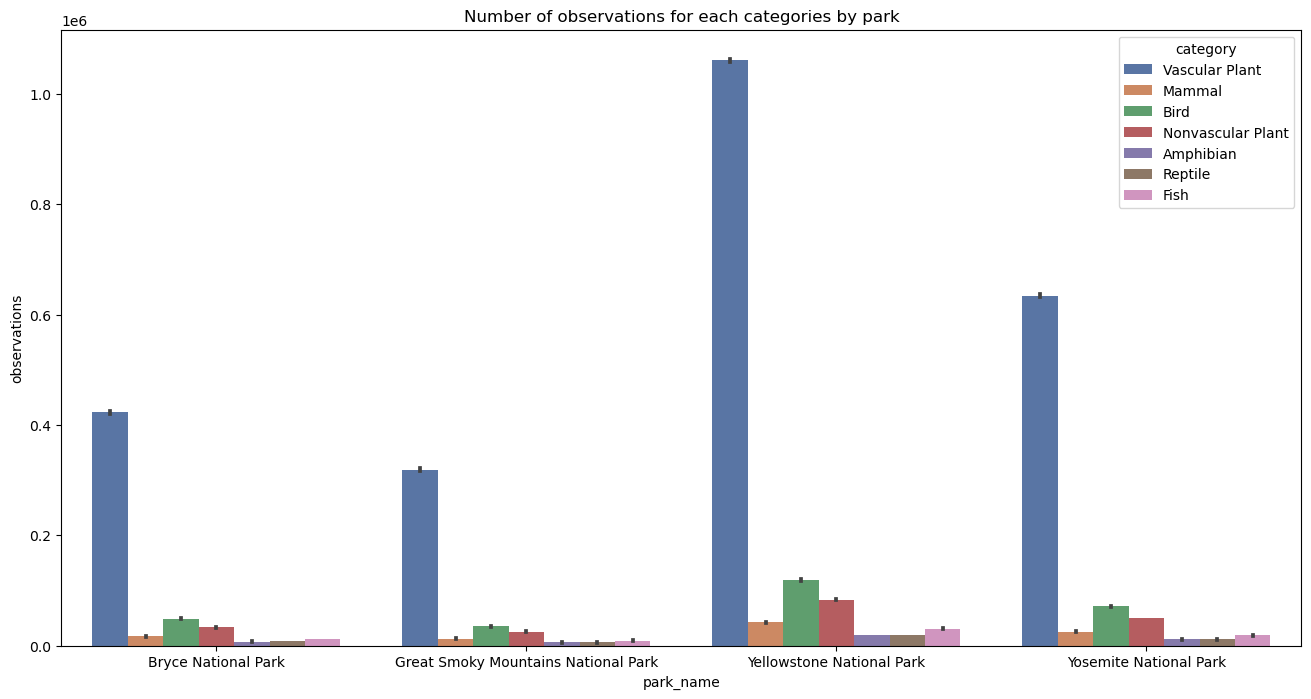

In [36]:
order = ['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']
sns.set_palette('deep')
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='park_name', y='observations', data=observations, hue='category',estimator = np.sum, order=order)
plt.title('Number of observations for each categories by park')


Text(0.5, 1.0, 'Number of observations for each park by category')

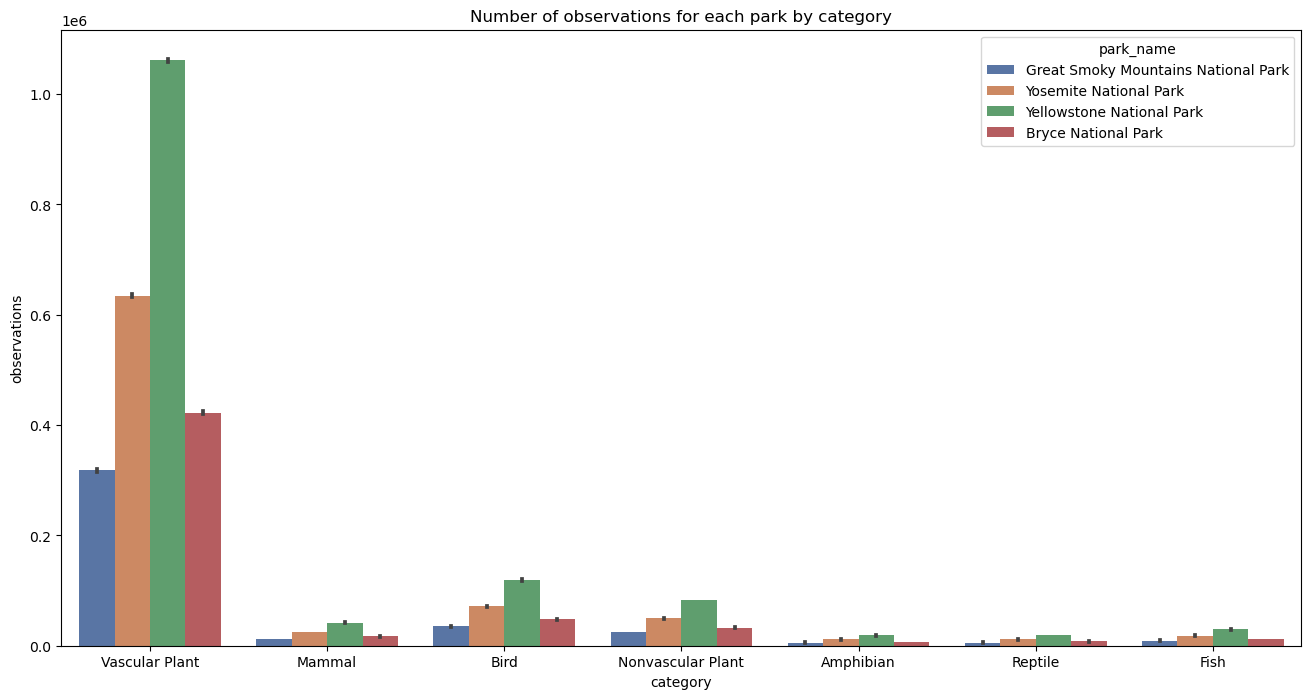

In [37]:
sns.set_palette('deep')
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='category', y='observations', data=observations, hue='park_name', estimator=np.sum)
plt.title('Number of observations for each park by category')

In [38]:
#animal_count = observations.groupby(['category', 'park_name']).max
#animal_count.max()
animal_count = observations.pivot_table(index='scientific_name', columns='park_name', values='observations' )
animal_count

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
scientific_name,,,,
Abies bifolia,109,72,215,136
Abies concolor,83,101,241,205
Abies fraseri,109,81,218,110
Abietinella abietina,101,65,243,183
Abronia ammophila,92,72,222,137
...,...,...,...,...
Zonotrichia leucophrys gambelii,58,87,246,169
Zonotrichia leucophrys oriantha,73,123,227,135
Zonotrichia querula,105,83,268,160


In [39]:
observations['observations'].max()

321

In [40]:
observations['observations'].describe()

count    22164.000000
mean       142.314835
std         69.885082
min          9.000000
25%         86.000000
50%        124.000000
75%        195.000000
max        321.000000
Name: observations, dtype: float64

In [41]:
observations[observations['observations'] == 321]

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
9249,Lycopodium tristachyum,Yellowstone National Park,321,Vascular Plant,"Deep-Root Clubmoss, Ground Cedar",No Intervention,False


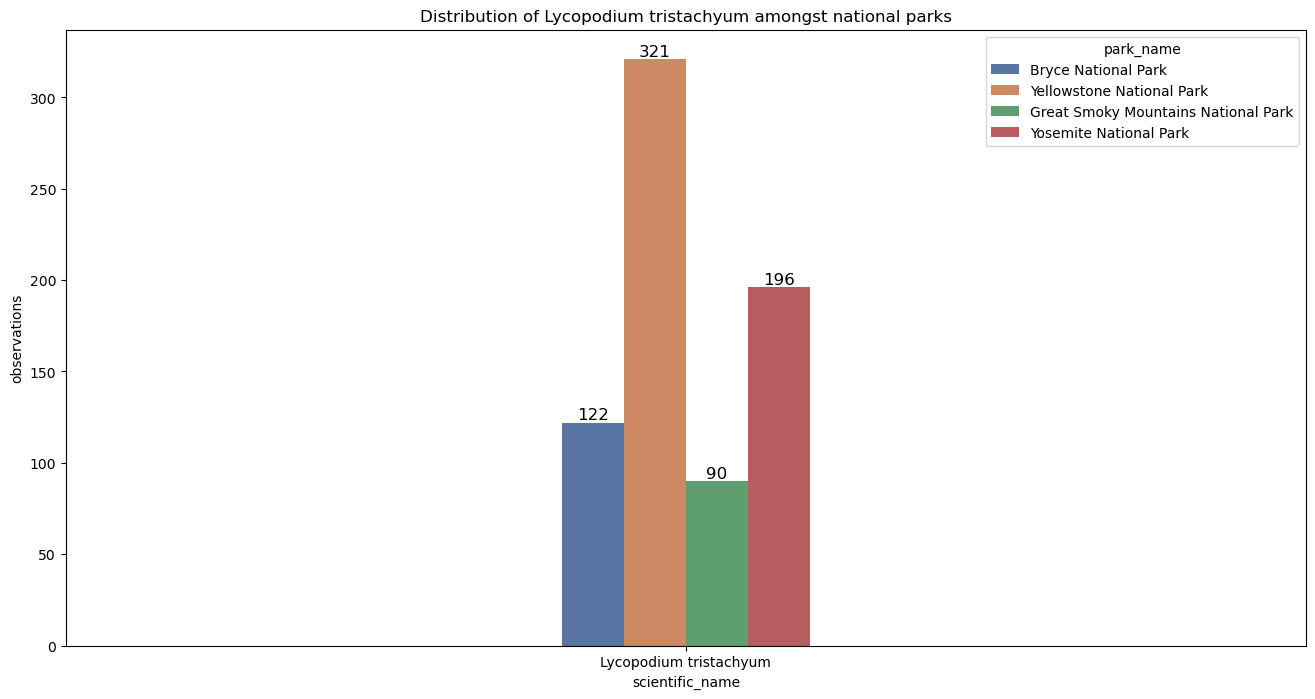

<Figure size 640x480 with 0 Axes>

In [71]:
prevalent_animal = observations[observations['scientific_name'] == 'Lycopodium tristachyum']
sns.set_palette('deep')
fig = plt.figure(figsize=(16,8))
ax = sns.barplot(x='scientific_name', y='observations', data=prevalent_animal, hue='park_name', width=0.2)
for i in ax.containers:
    ax.bar_label(i, fontsize=12)
plt.title('Distribution of Lycopodium tristachyum amongst national parks')
plt.show()
plt.clf()

Which animal is most prevalent and what is their distribution amongst parks? 

In [124]:
animal_count.loc[['Lycopodium tristachyum']].sum(axis=0)

park_name
Bryce National Park                    122
Great Smoky Mountains National Park     90
Yellowstone National Park              321
Yosemite National Park                 196
dtype: int64

In [125]:
animal_count['Total Observations'] = animal_count.sum(axis=1)

In [134]:
animal_count[animal_count['Total Observations'] == 735]

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,Total Observations
scientific_name,,,,,
Branta hutchinsii,108,139,297,191,735


In [135]:
animal_count.max()

park_name
Bryce National Park                    176
Great Smoky Mountains National Park    147
Yellowstone National Park              321
Yosemite National Park                 223
Total Observations                     735
dtype: int64

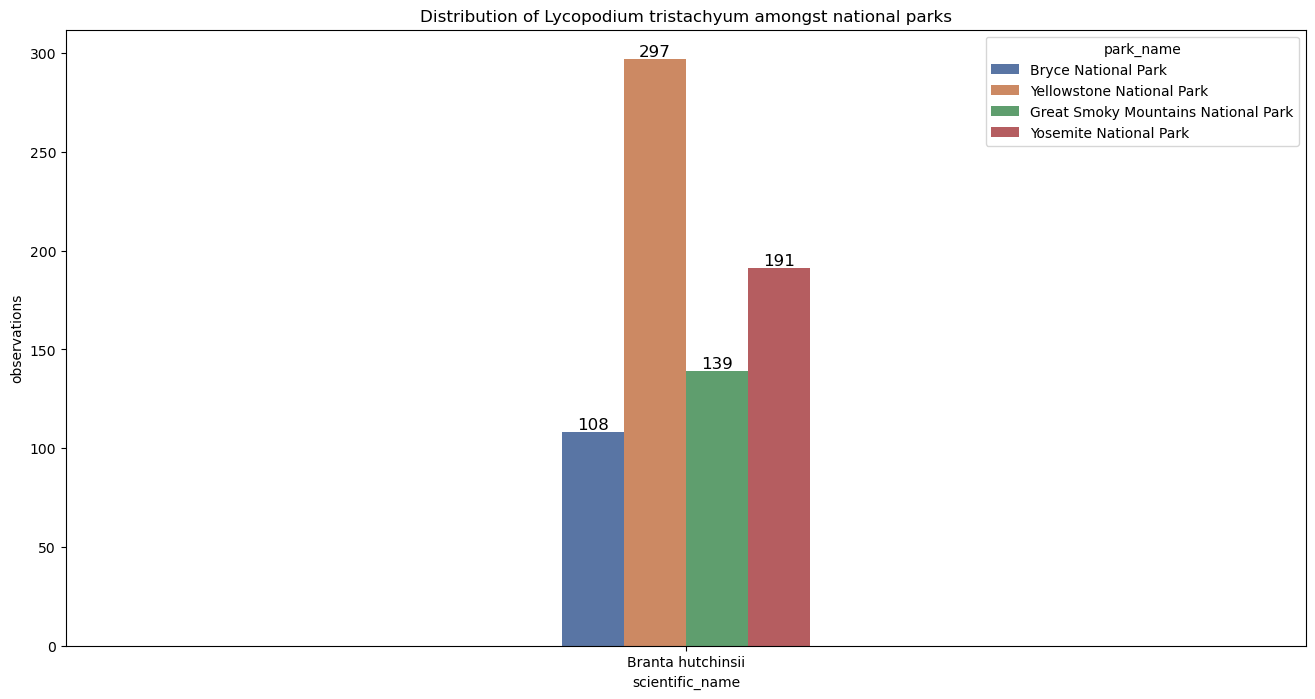

<Figure size 640x480 with 0 Axes>

In [137]:
prevalent_animal = observations[observations['scientific_name'] == 'Branta hutchinsii']
sns.set_palette('deep')
fig = plt.figure(figsize=(16,8))
ax = sns.barplot(x='scientific_name', y='observations', data=prevalent_animal, hue='park_name', width=0.2)
for i in ax.containers:
    ax.bar_label(i, fontsize=12)
plt.title('Distribution of Lycopodium tristachyum amongst national parks')
plt.show()
plt.clf()

### Conclusion 

In conclusion, we have answered the above questions: 
 
- What is the distribution of conservation status for species? 
    - The vast majority of species were not considered for analysis (5633 vs 191)
- Are certain types of species more likely to be endangered? 
    - Mammals and Birds are more likely to be endangered, with Vascular Plants least likely to be protected
- Which animal is most prevalent and what is their distribution amongst parks? 
    - The study found that the `Bird` `Branta hutchinsii` was the most prevalent with a total 735 observations across all four national parks. The `Vascular Plant` `Lycopodium tristachyum` was the most prevalent in a *singular* park 